Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
  Apple___alternaria_leaf_spot: 278 images
  Apple___black_rot: 300 images
  Apple___brown_spot: 215 images
  Apple___gray_spot: 300 images
  Apple___healthy: 300 images
  Apple___rust: 300 images
  Apple___scab: 300 images
  Bell_pepper___bacterial_spot: 300 images
  Bell_pepper___healthy: 300 images
  Blueberry___healthy: 300 images
  Cassava___bacterial_blight: 300 images
  Cassava___brown_streak_disease: 300 images
  Cassava___green_mottle: 300 images
  Cassava___healthy: 300 images
  Cassava___mosaic_disease: 300 images
  Cherry___healthy: 300 images
  Cherry___powdery_mildew: 300 images
  Coffee___healthy: 300 images
  Coffee___red_spider_mite: 167 images
  Coffee___rust: 300 images
  Corn___common_rust: 300 images
  Corn___gray_leaf_spot: 300 images
  Corn___healthy: 300 images
  Corn___northern_leaf_blight: 300 images
  Grape___Leaf_blight: 300 images

Model: "functional_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_17 (InputLayer)     │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling_5 (Rescaling)         │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ mobilenetv2_1.00_224            │ (None, 7, 7, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_5      │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 1280)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 71)             │        90,951 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,348,935 (8.96 MB)

 Trainable params: 90,951 (355.28 KB)

 Non-trainable params: 2,257,984 (8.61 MB)


TARGET: 95%+ VALIDATION ACCURACY

STARTING TRAINING

Epoch 1/30
515/515 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.4351 - loss: 2.2412
Epoch 1: val_accuracy improved from -inf to 0.79626, saving model to best_weights.weights.h5
515/515 ━━━━━━━━━━━━━━━━━━━━ 1013s 2s/step - accuracy: 0.4354 - loss: 2.2396 - val_accuracy: 0.7963 - val_loss: 0.6903 - learning_rate: 0.0010
Epoch 2/30
514/515 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step - accuracy: 0.7893 - loss: 0.6740
Epoch 2: val_accuracy improved from 0.79626 to 0.82613, saving model to best_weights.weights.h5
515/515 ━━━━━━━━━━━━━━━━━━━━ 52s 100ms/step - accuracy: 0.7893 - loss: 0.6738 - val_accuracy: 0.8261 - val_loss: 0.5497 - learning_rate: 0.0010
Epoch 3/30
514/515 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - accuracy: 0.8315 - loss: 0.5196
Epoch 3: val_accuracy improved from 0.82613 to 0.84216, saving model to best_weights.weights.h5
515/515 ━━━━━━━━━━━━━━━━━━━━ 49s 95ms/step - accuracy: 0.8316 - loss: 0.5196 - val_accuracy: 0.8422 - val_loss: 0.4

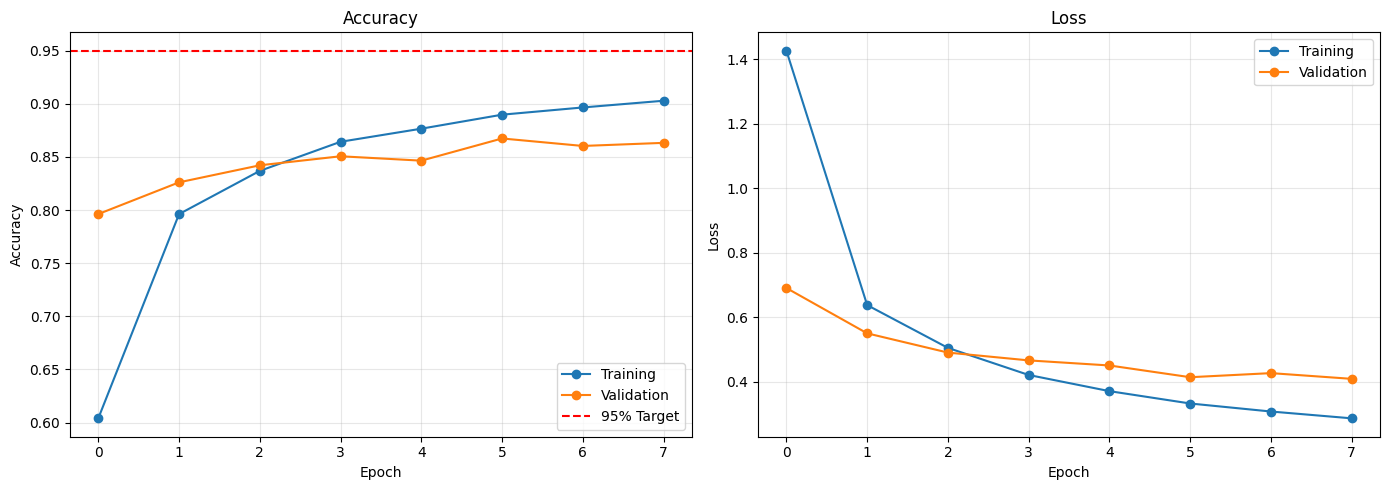


Best validation accuracy: 86.74% (Epoch 6)

CONFUSION MATRIX & EVALUATION METRICS

Making predictions on validation set...
Generated predictions for 4118 validation images



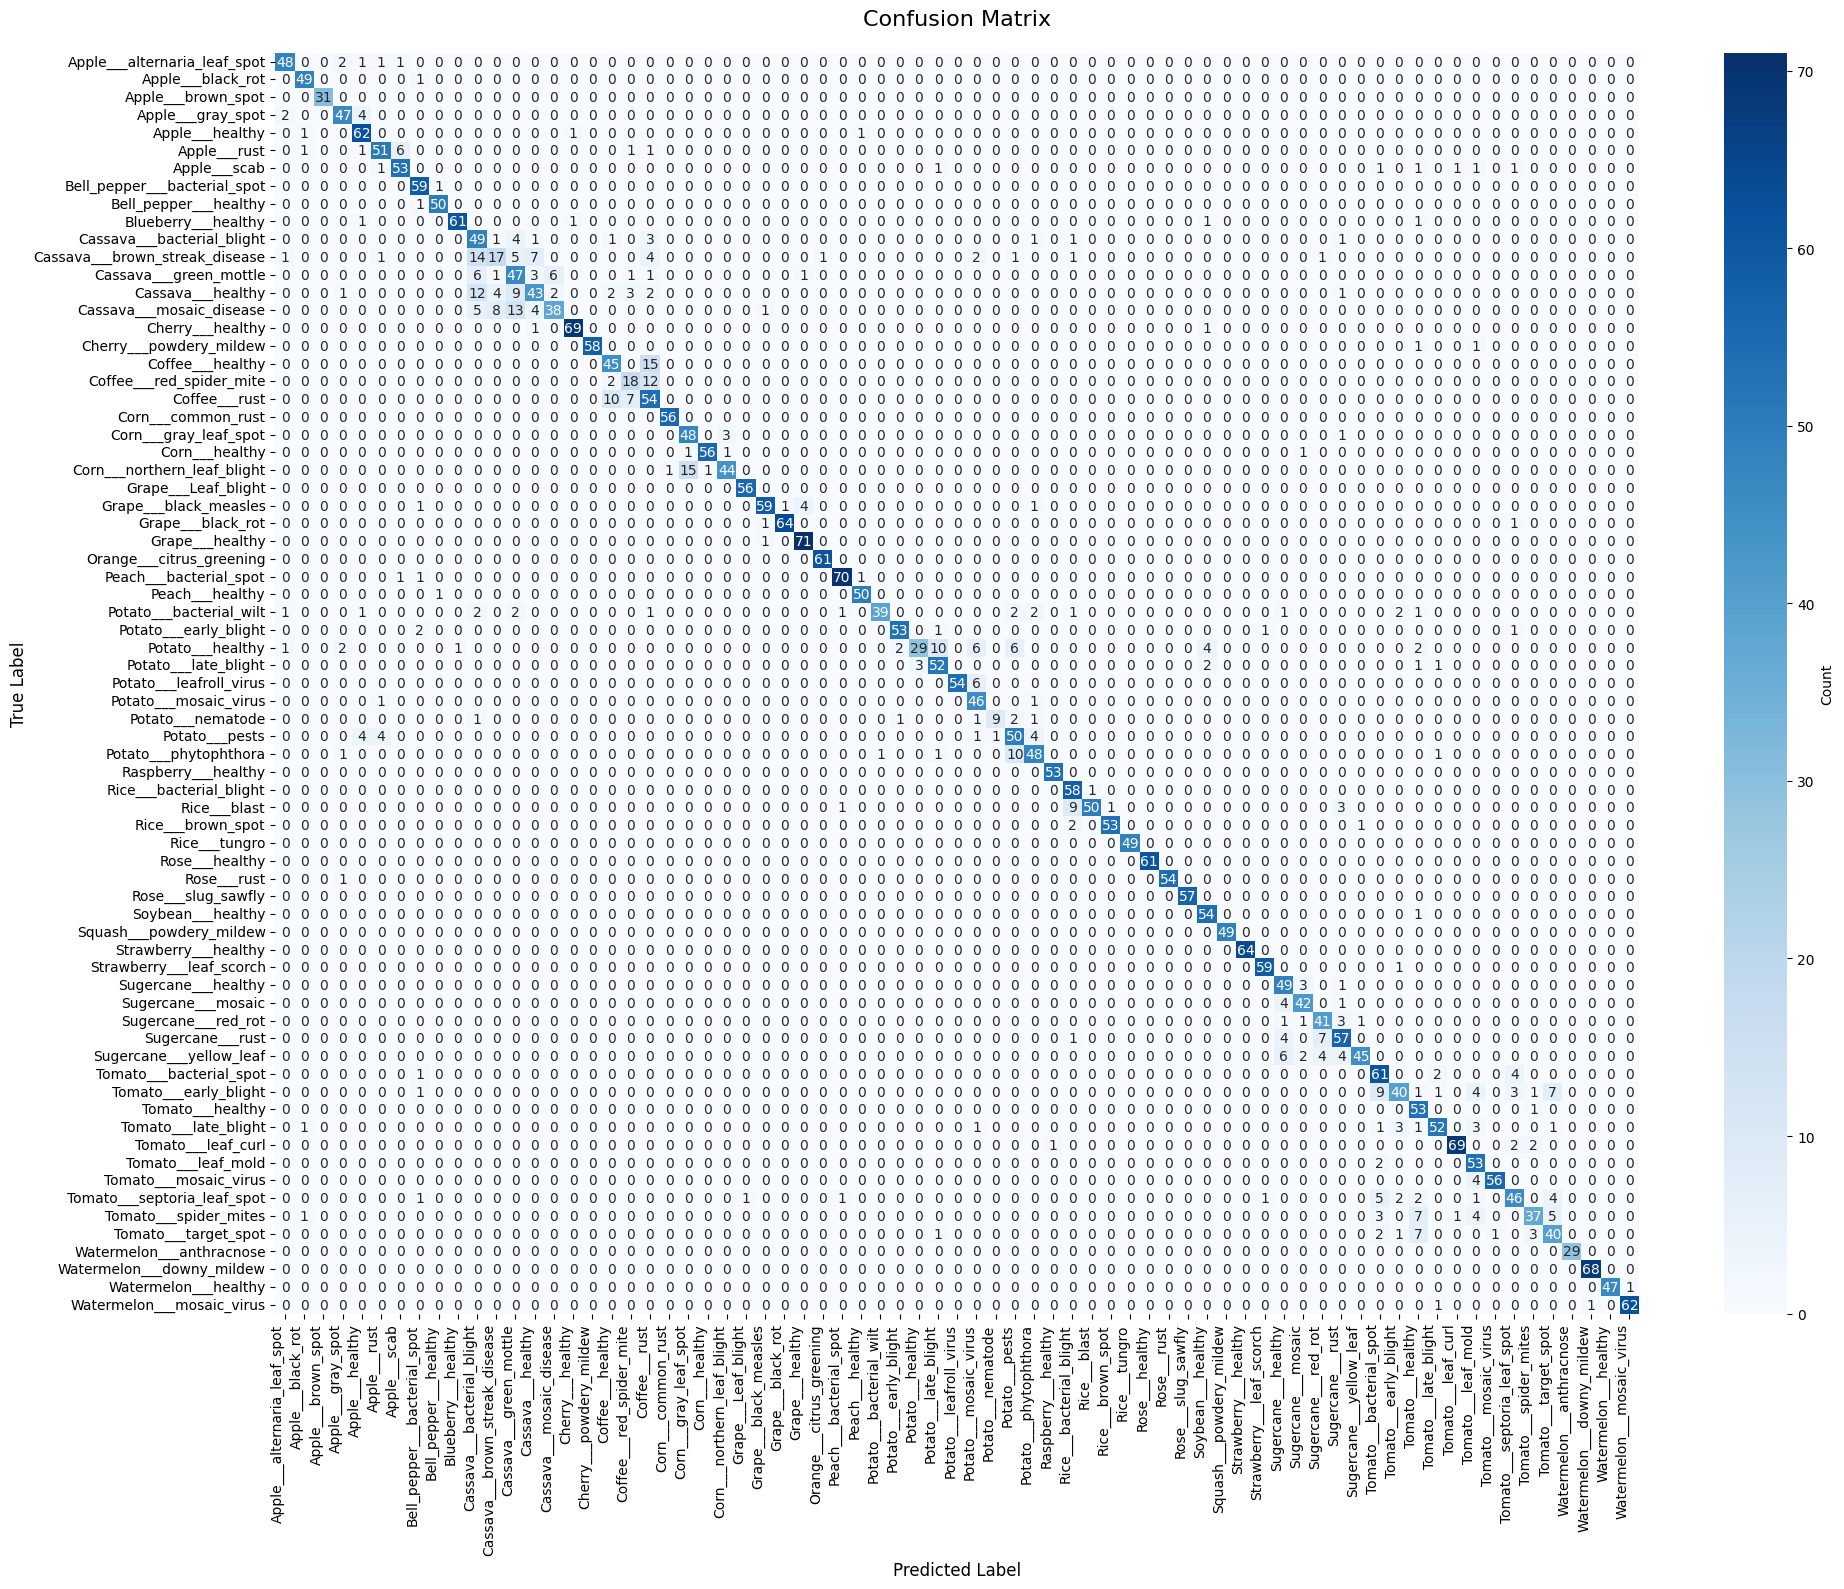


CLASSIFICATION REPORT

                                precision    recall  f1-score   support

  Apple___alternaria_leaf_spot      0.906     0.906     0.906        53
             Apple___black_rot      0.925     0.980     0.951        50
            Apple___brown_spot      1.000     1.000     1.000        31
             Apple___gray_spot      0.870     0.887     0.879        53
               Apple___healthy      0.838     0.954     0.892        65
                  Apple___rust      0.864     0.836     0.850        61
                  Apple___scab      0.869     0.883     0.876        60
  Bell_pepper___bacterial_spot      0.868     0.983     0.922        60
         Bell_pepper___healthy      0.962     0.980     0.971        51
           Blueberry___healthy      0.984     0.938     0.961        65
    Cassava___bacterial_blight      0.551     0.790     0.649        62
Cassava___brown_streak_disease      0.548     0.309     0.395        55
        Cassava___green_mottle      0.5

In [ ]:
# ============================================
# PLANT DISEASE CLASSIFICATION TRAINING
# ============================================

# Step 1: Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Step 2: Install/Import required libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
import numpy as np
import json
import os
from pathlib import Path

# Step 3: Configuration - Get Images From Google
DATA_PATH = '/content/drive/MyDrive/ECE 574 Plant App/archive (1)/data'
MAX_IMAGES_PER_CLASS = 300  # CHANGE TO ADD MORE/LESS IMAGES
IMG_SIZE = (224, 224) # Resize images to this size
BATCH_SIZE = 32 # keep lower to use less GPU memory
MAX_EPOCHS = 30
LEARNING_RATE = 0.001
VALIDATION_SPLIT = 0.2

# Step 4: Build file list with only first N images per class
image_paths = []
labels = []
class_names = []

for class_folder in sorted(os.listdir(DATA_PATH)):
    class_path = os.path.join(DATA_PATH, class_folder)
    if not os.path.isdir(class_path):
        continue

    class_idx = len(class_names)
    class_names.append(class_folder)

    images = [f for f in os.listdir(class_path)
              if f.lower().endswith(('.jpg', '.jpeg', '.png'))]

    count = 0
    for img_file in images[:MAX_IMAGES_PER_CLASS]:
        image_paths.append(os.path.join(class_path, img_file))
        labels.append(class_idx)
        count += 1

    print(f"  {class_folder}: {count} images")

num_classes = len(class_names)
total_images = len(image_paths)

print(f"\nDataset ready: {num_classes} classes, {total_images} images")

# Step 5: Create TensorFlow dataset from file paths
def load_and_preprocess_image(path, label):
    img = tf.io.read_file(path)
    img = tf.image.decode_jpeg(img, channels=3)
    img = tf.image.resize(img, IMG_SIZE)
    img = tf.cast(img, tf.float32)
    return img, label

labels_one_hot = tf.one_hot(labels, num_classes)
dataset = tf.data.Dataset.from_tensor_slices((image_paths, labels_one_hot))
dataset = dataset.shuffle(buffer_size=len(image_paths), seed=123)

train_size = int(len(image_paths) * (1 - VALIDATION_SPLIT))
train_ds = dataset.take(train_size)
val_ds = dataset.skip(train_size)

train_ds = train_ds.map(load_and_preprocess_image, num_parallel_calls=tf.data.AUTOTUNE)
val_ds = val_ds.map(load_and_preprocess_image, num_parallel_calls=tf.data.AUTOTUNE)

train_ds = train_ds.batch(BATCH_SIZE)
val_ds = val_ds.batch(BATCH_SIZE)

print(f"Training on {train_size} images")
print(f"Validating on {len(image_paths) - train_size} images")

# Step 6: Add data augmentation
data_augmentation = keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.2),
    layers.RandomZoom(0.2),
])

def augment(image, label):
    return data_augmentation(image, training=True), label

train_ds = train_ds.map(augment, num_parallel_calls=tf.data.AUTOTUNE)

AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache('/tmp/train_cache').prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache('/tmp/val_cache').prefetch(buffer_size=AUTOTUNE)

# Step 7: Build model using Functional API
print("\nBuilding model with Functional API...")

base_model = MobileNetV2(
    input_shape=IMG_SIZE + (3,),
    include_top=False,
    weights='imagenet'
)
base_model.trainable = False

inputs = keras.Input(shape=IMG_SIZE + (3,))
x = layers.Rescaling(1./127.5, offset=-1)(inputs)
x = base_model(x, training=False)
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dropout(0.3)(x)
outputs = layers.Dense(num_classes, activation='softmax')(x)

model = keras.Model(inputs=inputs, outputs=outputs)

model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=LEARNING_RATE),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()

# Step 8: Setup callbacks
early_stopping = EarlyStopping(
    monitor='val_accuracy',
    patience=8,
    restore_best_weights=True,
    verbose=1,
    mode='max',
    baseline=0.99
)

checkpoint = ModelCheckpoint(
    'best_weights.weights.h5',
    monitor='val_accuracy',
    save_best_only=True,
    save_weights_only=True,
    verbose=1,
    mode='max'
)

reduce_lr = ReduceLROnPlateau(
    monitor='val_accuracy',
    factor=0.5,
    patience=4,
    verbose=1,
    mode='max',
    min_lr=0.000001
)

# Step 9: Train
print("="*60)
print("STARTING TRAINING")
print("="*60 + "\n")

import time
start_time = time.time()

history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=MAX_EPOCHS,
    callbacks=[early_stopping, checkpoint, reduce_lr],
    verbose=1
)

training_time = time.time() - start_time

# Step 10: Results
print("\n" + "="*60)
print("TRAINING COMPLETE!")
print("="*60 + "\n")

actual_epochs = len(history.history['accuracy'])
print(f"Training time: {training_time/60:.1f} minutes")
print(f"Trained for {actual_epochs} epochs")

train_loss, train_acc = model.evaluate(train_ds, verbose=0)
val_loss, val_acc = model.evaluate(val_ds, verbose=0)

print(f"\nFinal Results:")
print(f"  Training Accuracy: {train_acc*100:.2f}%")
print(f"  Validation Accuracy: {val_acc*100:.2f}%")

# Step 11: Save model AND weights
print("\nSaving model...")
model.save('crop_model.keras')
print("Full model saved as 'crop_model.keras'")

# Step 12: Save class labels
class_labels = {i: name for i, name in enumerate(class_names)}
with open('class_labels.json', 'w') as f:
    json.dump(class_labels, f, indent=2)
print("Class labels saved as 'class_labels.json'")

# Step 13: Visualize training
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training', marker='o')
plt.plot(history.history['val_accuracy'], label='Validation', marker='o')
plt.axhline(y=0.95, color='r', linestyle='--', label='95% Target')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training', marker='o')
plt.plot(history.history['val_loss'], label='Validation', marker='o')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

max_val_acc = max(history.history['val_accuracy'])
best_epoch = history.history['val_accuracy'].index(max_val_acc) + 1
print(f"\nBest validation accuracy: {max_val_acc*100:.2f}% (Epoch {best_epoch})")

# Step 14: Generate Confusion Matrix and Detailed Evaluation
print("\n" + "="*60)
print("CONFUSION MATRIX & EVALUATION METRICS")
print("="*60 + "\n")

from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# Get predictions on validation set
print("Making predictions on validation set...")
y_true = []
y_pred = []

for images, labels in val_ds:
    predictions = model.predict(images, verbose=0)
    y_true.extend(np.argmax(labels.numpy(), axis=1))
    y_pred.extend(np.argmax(predictions, axis=1))

y_true = np.array(y_true)
y_pred = np.array(y_pred)

print(f"Generated predictions for {len(y_true)} validation images\n")

# Calculate confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix
plt.figure(figsize=(20, 16))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names,
            cbar_kws={'label': 'Count'})
plt.title('Confusion Matrix', fontsize=16, pad=20)
plt.ylabel('True Label', fontsize=12)
plt.xlabel('Predicted Label', fontsize=12)
plt.xticks(rotation=90, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# Print classification report
print("\n" + "="*60)
print("CLASSIFICATION REPORT")
print("="*60 + "\n")
print(classification_report(y_true, y_pred, target_names=class_names, digits=3))

# Calculate and show per-class accuracy
print("\n" + "="*60)
print("PER-CLASS ACCURACY")
print("="*60 + "\n")

class_accuracies = []
for i, class_name in enumerate(class_names):
    class_mask = (y_true == i)
    if class_mask.sum() > 0:
        class_acc = (y_pred[class_mask] == y_true[class_mask]).mean()
        class_accuracies.append((class_name, class_acc, class_mask.sum()))
    else:
        class_accuracies.append((class_name, 0.0, 0))

# Sort by accuracy (worst to best)
class_accuracies.sort(key=lambda x: x[1])

print("Worst performing classes:")
for name, acc, count in class_accuracies[:5]:
    print(f"  {name}: {acc*100:.1f}% ({count} samples)")

print("\nBest performing classes:")
for name, acc, count in class_accuracies[-5:]:
    print(f"  {name}: {acc*100:.1f}% ({count} samples)")

# Save confusion matrix data
np.save('confusion_matrix.npy', cm)
print("\n✓ Confusion matrix saved as 'confusion_matrix.npy'")

# Save classification report to text file
with open('classification_report.txt', 'w') as f:
    f.write("CLASSIFICATION REPORT\n")
    f.write("="*60 + "\n\n")
    f.write(classification_report(y_true, y_pred, target_names=class_names, digits=3))
    f.write("\n\nPER-CLASS ACCURACY\n")
    f.write("="*60 + "\n\n")
    for name, acc, count in sorted(class_accuracies, key=lambda x: x[1]):
        f.write(f"{name}: {acc*100:.1f}% ({count} samples)\n")
